# 7 Plotting Chapter Results

This notebook congregates all saved results from previous notebooks for visualization.

## Import libraries

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

import torch

import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from comms import *

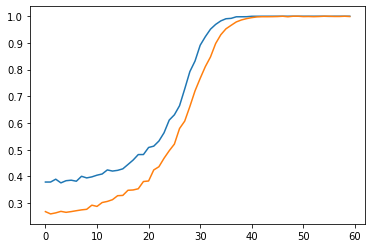

In [2]:
# load baselines
dt_base = np.load('baselines/dt_baselines.npz')
mf_base = np.load('baselines/mf_baselines.npz')
dt_bpsk_baseline = dt_base['bpsk_baseline']
dt_qpsk_baseline = dt_base['qpsk_baseline']
mf_bpsk_baseline = mf_base['bpsk_baseline']
mf_qpsk_baseline = mf_base['qpsk_baseline']
plt.plot(dt_bpsk_baseline)
plt.plot(dt_qpsk_baseline)

In [3]:
model_config = {'hidden_size': 64,
                'num_layers': 2,
                'input_size': 2,
                'output_size': 4}

data_config = {'snr': 0,
               'num_examples': 16384,
               'seq_length': 5,
               'sps': 4,
               'span': 10}

training_config = {'num_epochs': 100,
                   'batch_size': 32,
                   'learning_rate': 0.001,
                   'weight_decay': 0.0001,
                   'teacher_forcing': False}

In [4]:
layers = [1,2,3]
hidden_sizes = [16,32,64,128]
test_snr_range = np.arange(-30,30)
weight_decays = [0, 0.0001, 0.0003, 0.001]
batch_size = 64

num_models = 1

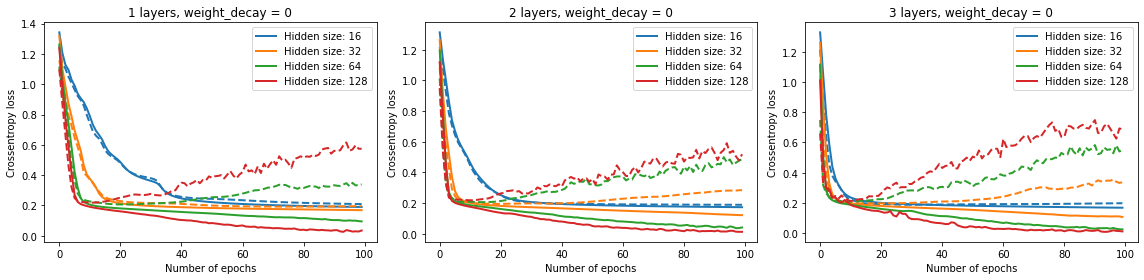

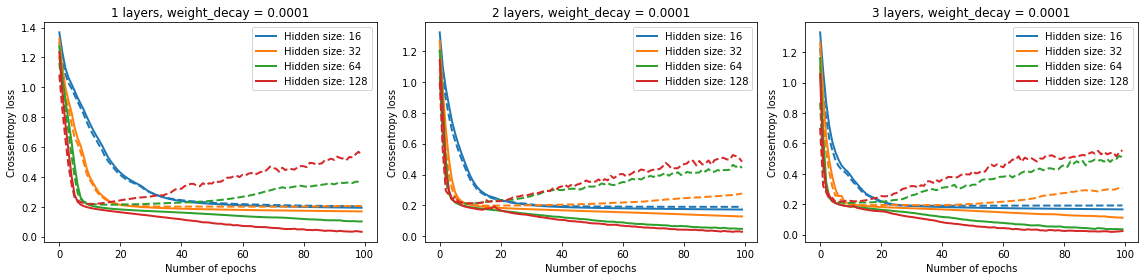

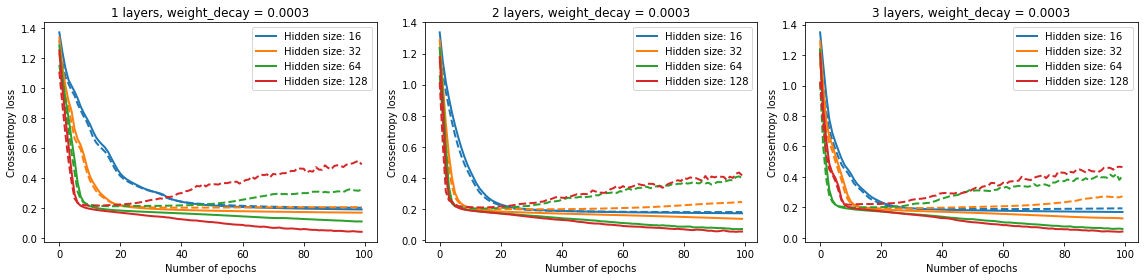

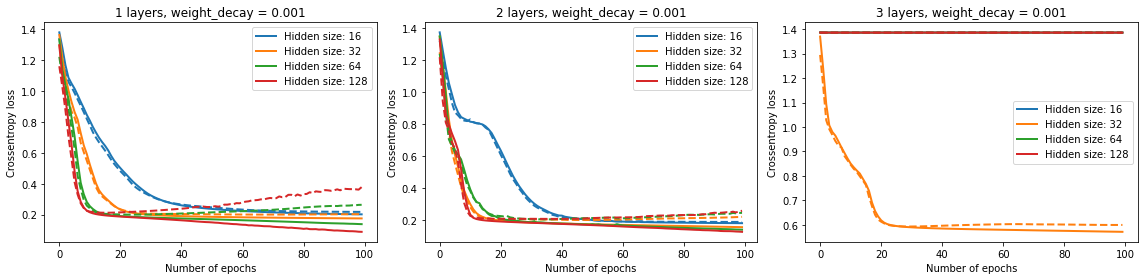

In [5]:
weight_decays = [0, 0.0001, 0.0003, 0.001]
for wd in weight_decays:
    fig ,ax = plt.subplots(1,3, figsize=(16,4))
    for idx, layer_num in enumerate(layers):
        for i, hs in enumerate(hidden_sizes):
    #         for model in torch.load(f'models/seq2seq_qpsk_{layer_num}_{hs}.pt'):
    #             plt.plot(model['losses'], f'C{i}')
    #             plt.plot(model['val_losses'], f'C{i}--')
            losses = np.mean([model['losses'] for model in torch.load(f"models/seq2seq_qpsk_{layer_num}_{hs}_wd_{wd}.pt")], axis=0)
            val_losses = np.mean([model['val_losses'] for model in torch.load(f"models/seq2seq_qpsk_{layer_num}_{hs}_wd_{wd}.pt")], axis=0)
            ax[idx].plot(losses,  f'C{i}', linewidth=2)
            ax[idx].plot(val_losses,  f'C{i}--', linewidth=2)
            
        
            legend_elements = [Line2D([0], [0], color='C0', lw=2),
                        Line2D([0], [0], color='C1', lw=2),
                        Line2D([0], [0], color='C2', lw=2),
                        Line2D([0], [0], color='C3', lw=2)]
        
            ax[idx].legend(legend_elements, ('Hidden size: 16', 'Hidden size: 32', 'Hidden size: 64', 'Hidden size: 128'))
            
            ax[idx].set_title(f'{layer_num} layers, weight_decay = {wd}')
            ax[idx].set_xlabel('Number of epochs'); ax[idx].set_ylabel('Crossentropy loss')
            ax[idx].grid()
    plt.tight_layout()
    # plt.savefig(f'figures/seq2seq_qpsk_losses_{layer_num}_layers_{training_config["num_epochs"]}_epochs_wd_{wd}.png', 
                # dpi=300, bbox_inches='tight')

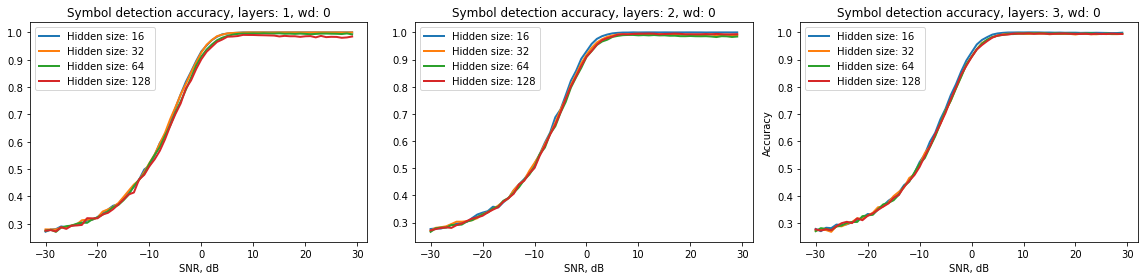

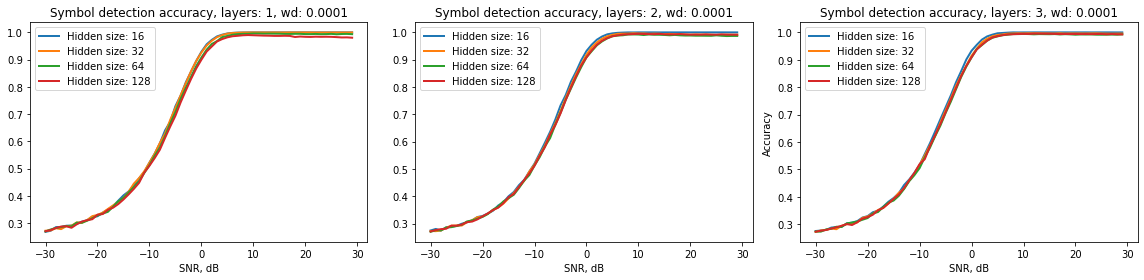

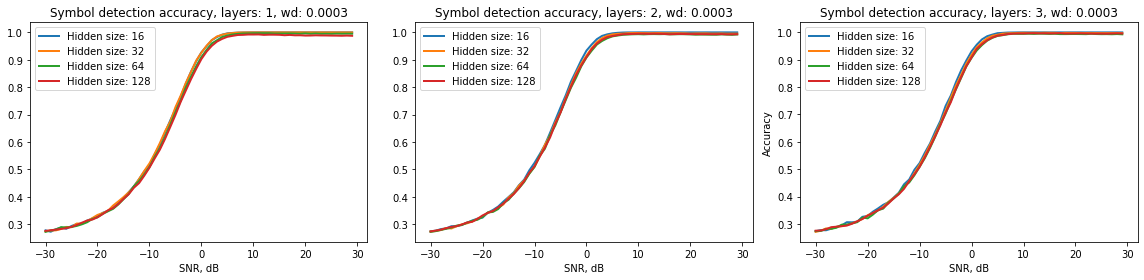

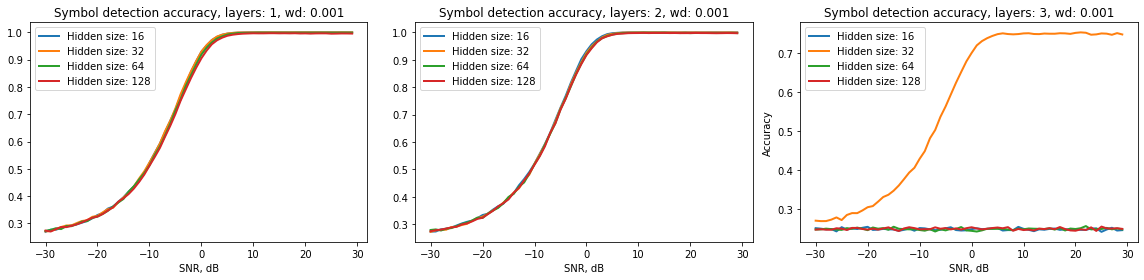

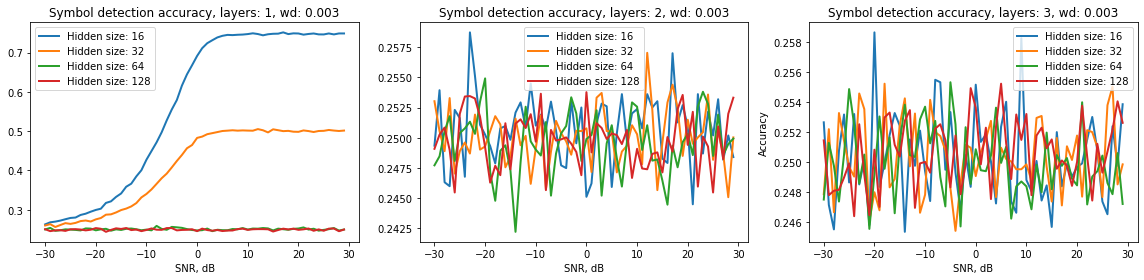

In [6]:
weight_decays = [0, 0.0001, 0.0003, 0.001, 0.003]
for wd in weight_decays:
    fig ,ax = plt.subplots(1,3, figsize=(16,4))
    for idx, layer_num in enumerate(layers):
        for i, hs in enumerate(hidden_sizes):
            accs = np.mean([model['accs'] for model in torch.load(f"results/seq2seq_qpsk_{layer_num}_{hs}_wd_{wd}.pt")], axis=0)
            snr_range = torch.load(f"results/seq2seq_qpsk_{layer_num}_{hs}_wd_{wd}.pt")[0]['snr_range']
            ax[idx].plot(snr_range, accs, f'C{i}', linewidth=2)
    #         accs = torch.load(f'results/seq2seq_qpsk_{layer_num}_{hs}.pt')['accs']
    #         snr_range = torch.load(f'results/seq2seq_qpsk_{layer_num}_{hs}.pt')['snr_range']
            ax[idx].grid()
            ax[idx].set_title(f'Symbol detection accuracy, layers: {layer_num}, wd: {wd}')
            ax[idx].legend(('Hidden size: 16', 'Hidden size: 32', 'Hidden size: 64', 'Hidden size: 128'))
            ax[idx].set_xlabel('SNR, dB'); plt.ylabel('Accuracy')
            plt.tight_layout()
    #     plt.savefig(f'figures/seq2seq_qpsk_accs_{layer_num}_layers_{training_config["num_epochs"]}_epochs.svg',
    #                 dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Average accuracy')

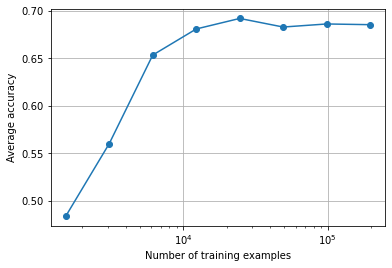

In [7]:
all_all_accs = []
model_configs = [(16,2), (128,2), (16,3), (128,3)]

train_sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
for model_config in model_configs:
    all_accs = []
    for train_size in train_sizes:
        result = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{data_config['seq_length']}_trained_on_{train_size}.pt")
        all_accs.append((np.array(result['bpsk_accs']) + np.array(result['qpsk_accs']))/2)
    all_all_accs.append(all_accs)

# plt.semilogx(np.array(train_sizes)*2*7, np.array(all_all_accs[0]).mean(axis=1), '-o')
# plt.semilogx(np.array(train_sizes)*2*7, np.array(all_all_accs[1]).mean(axis=1), '-o')
plt.semilogx(np.array(train_sizes)*2*6, np.array(all_all_accs[2]).mean(axis=1), '-o')
# plt.semilogx(np.array(train_sizes)*2*6, np.array(all_all_accs[3]).mean(axis=1), '-o')
plt.grid()
# plt.legend(['Hidden size: 16', 'Hidden size: 128'])
plt.xlabel('Number of training examples'); plt.ylabel('Average accuracy')
# plt.savefig('figures/best_train_size_snr.png', dpi=300, bbox_inches='tight')

In [8]:
model_config = {'hidden_size': 16,
                'num_layers': 3,
                'input_size': 2,
                'output_size': 6}

# 'snr': np.array([-10, -5, 0, 5, 10, 15])
data_config = {'snr': np.arange(-5,21,5),
               'num_examples_bpsk': 2048,
               'num_examples_qpsk': 2048,
               'seq_length': 5,
               'sps': 4,
               'span': 10,
               'num_examples_val': 256}

train_config = {'num_epochs': 250,
                'batch_size': 64,
                'learning_rate': 3e-4,
                'weight_decay': 0.0001,
                'device': 'cuda',
                'tf_ratio': 0}

test_config = {'snr_range': np.arange(-30,30),
               'num_iter': 1024}

# Teacher forcing

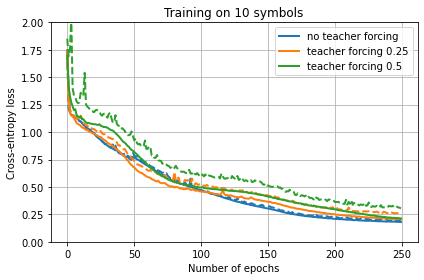

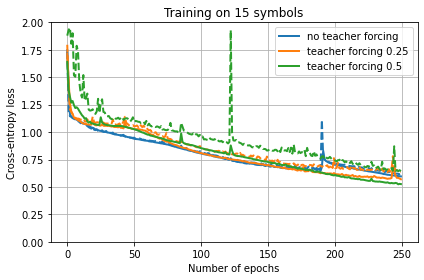

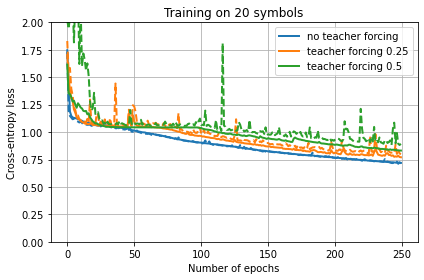

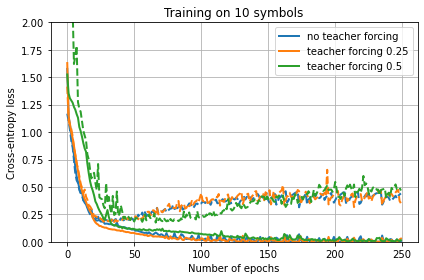

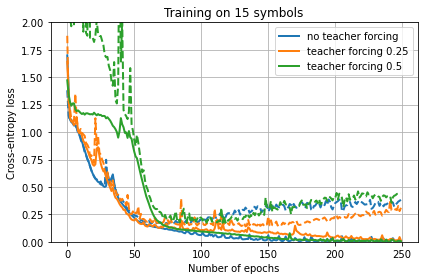

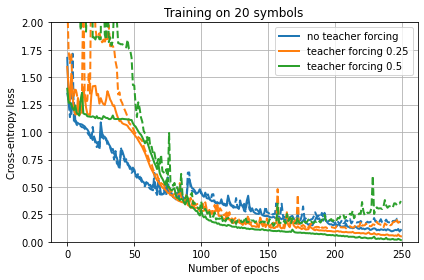

In [9]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]

for model_config in model_configs:
    for seq_length in seq_lengths:
        plt.figure()
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C0', linewidth=2)
        plt.plot(model['val_losses'], f'C0--', linewidth=2)

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.25.pt")
        plt.plot(model['losses'], f'C1', linewidth=2)
        plt.plot(model['val_losses'], f'C1--', linewidth=2)

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.5.pt")
        plt.plot(model['losses'], f'C2', linewidth=2)
        plt.plot(model['val_losses'], f'C2--', linewidth=2)

        legend_elements = [Line2D([0], [0], color='C0', lw=2, label='weight decay'),
                            Line2D([0], [0], color='C1', lw=2, label='dropout 0.25'),
                            Line2D([0], [0], color='C2', lw=2, label='dropout 0.5')]

        plt.legend(legend_elements, ['no teacher forcing', 'teacher forcing 0.25', 'teacher forcing 0.5'])
        plt.grid()
        plt.ylim([0,2])
        plt.xlabel('Number of epochs')
        plt.ylabel('Cross-entropy loss')
        plt.title(f'Training on {seq_length} symbols')
        plt.tight_layout()
        # plt.savefig(f'figures/seq2seq_bpsk_qpsk_teacher_forcing_training_{model_config[1]}_{model_config[0]}_seq_{seq_length}.png', dpi=300, bbox_inches='tight')

In [10]:
results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")

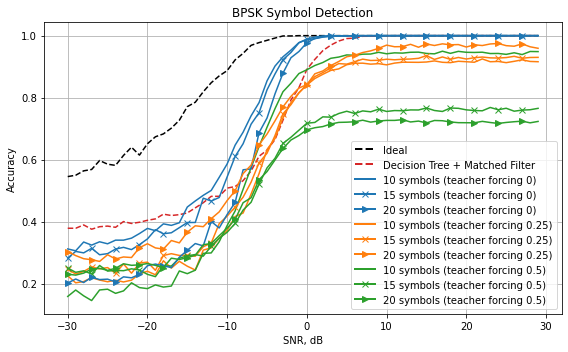

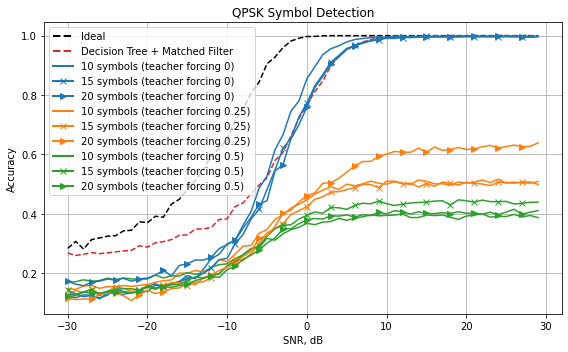

In [11]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]
model_config = (16,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    if mod == 'bpsk':
        plt.plot(results['snr_range'], mf_bpsk_baseline, '--k')
        plt.plot(results['snr_range'], dt_bpsk_baseline, '--C3')
    else:
        plt.plot(results['snr_range'], mf_qpsk_baseline, '--k')
        plt.plot(results['snr_range'], dt_qpsk_baseline, '--C3')
        

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}')
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}-x', markevery=3)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.5.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3)
    
    legend_elements = [Line2D([0], [0], linestyle='--', color='k', lw=2),
                       Line2D([0], [0], linestyle='--', color='C3', lw=2),
                        Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='x', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='x', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='x', color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['Ideal', 'Decision Tree + Matched Filter',
                                '10 symbols (teacher forcing 0)', '15 symbols (teacher forcing 0)', '20 symbols (teacher forcing 0)',
                                '10 symbols (teacher forcing 0.25)', '15 symbols (teacher forcing 0.25)', '20 symbols (teacher forcing 0.25)',
                                '10 symbols (teacher forcing 0.5)', '15 symbols (teacher forcing 0.5)', '20 symbols (teacher forcing 0.5)'])
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()


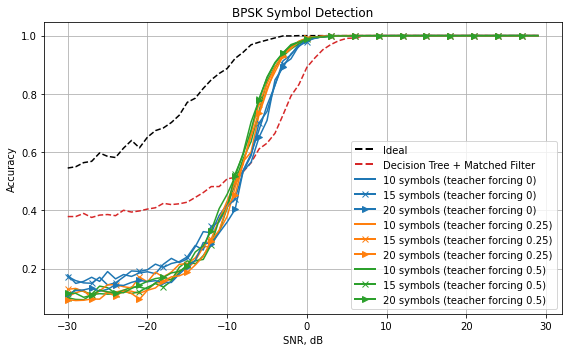

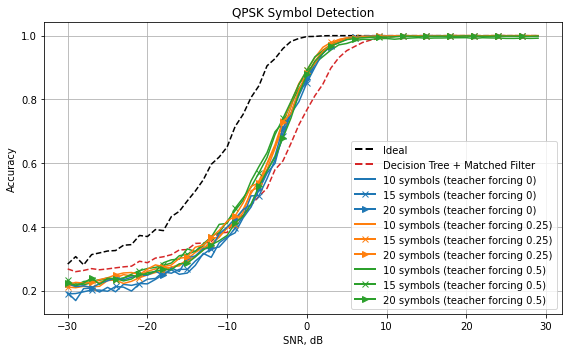

In [12]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]
model_config = (128,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    if mod == 'bpsk':
        plt.plot(results['snr_range'], mf_bpsk_baseline, '--k')
        plt.plot(results['snr_range'], dt_bpsk_baseline, '--C3')
    else:
        plt.plot(results['snr_range'], mf_qpsk_baseline, '--k')
        plt.plot(results['snr_range'], dt_qpsk_baseline, '--C3')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}')
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}-x', markevery=3)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.5.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3)

    legend_elements = [Line2D([0], [0], linestyle='--', color='k', lw=2),
                       Line2D([0], [0], linestyle='--', color='C3', lw=2),
                        Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='x', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='x', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='x', color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['Ideal', 'Decision Tree + Matched Filter',
                                '10 symbols (teacher forcing 0)', '15 symbols (teacher forcing 0)', '20 symbols (teacher forcing 0)',
                                '10 symbols (teacher forcing 0.25)', '15 symbols (teacher forcing 0.25)', '20 symbols (teacher forcing 0.25)',
                                '10 symbols (teacher forcing 0.5)', '15 symbols (teacher forcing 0.5)', '20 symbols (teacher forcing 0.5)'])
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()


In [13]:
tfs = [0, 0.25, 0.5]
hidden_sizes = [16, 128]
mods = ['bpsk', 'qpsk']

table = np.zeros([len(seq_lengths)*len(hidden_sizes)*len(tfs), 6])
j=0
for seq_length in seq_lengths:
    for hs in hidden_sizes:
        for tf in tfs:
            if tf == 0:
                results = torch.load(f"results/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048.pt")
            else:
                results = torch.load(f"results/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048_tf_ratio_{tf}.pt")
            
            if tf == 0:
                models = torch.load(f"models/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048.pt")
            else:
                models = torch.load(f"models/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048_tf_ratio_{tf}.pt")
            
            mean_acc_bpsk = np.array(results[f'bpsk_accs']).mean()
            mean_acc_qpsk = np.array(results[f'bpsk_accs']).mean()
            overall_acc = (mean_acc_bpsk + mean_acc_qpsk)/2
            best_loss = round(np.array(models['losses']).min(), 3)
            best_val_loss = round(np.array(models['val_losses']).min(), 3)
            # print(seq_length, mod.upper(), hs, drop, best_loss, best_val_loss, mean_acc)
            table[j] = np.array([seq_length, hs, tf, best_loss, best_val_loss, overall_acc])
            j+=1

test_frame = pd.DataFrame(table, columns=['seq length', 'hidden size', 'teacher forcing', 'best loss', 'best val loss', 'mean acc'])
test_frame['hidden size'] = test_frame['hidden size'].astype(int)
test_frame['best loss'] = test_frame['best loss'].map('{:,.3}'.format)
test_frame['best val loss'] = test_frame['best val loss'].map('{:,.4}'.format)
test_frame['mean acc'] = test_frame['mean acc'].map('{:,.3}'.format)
test_frame

# test_frame.to_latex('teacher_forcing.tex', index=False)

,seq length,hidden size,teacher forcing,best loss,best val loss,mean acc
0,10.0,16,0.00,0.18,0.191,0.762
1,10.0,16,0.25,0.205,0.259,0.748
2,10.0,16,0.50,0.213,0.303,0.703
3,10.0,128,0.00,0.001,0.191,0.69
4,10.0,128,0.25,0.001,0.181,0.687
5,10.0,128,0.50,0.004,0.175,0.672
6,15.0,16,0.00,0.596,0.616,0.633
7,15.0,16,0.25,0.57,0.634,0.652
8,15.0,16,0.50,0.524,0.643,0.693
9,15.0,128,0.00,0.001,0.159,0.676


# Dropout

best val_loss: 0.19144452114899954
best val_loss: 0.6155824979146322
best val_loss: 0.7109866281350454


best val_loss: 0.19072119990984598
best val_loss: 0.1587320665518443
best val_loss: 0.16534746612111728


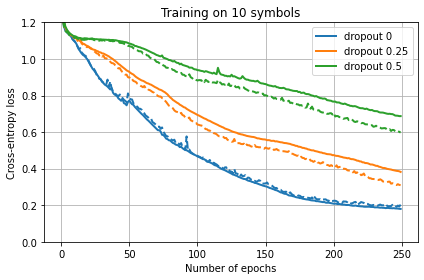

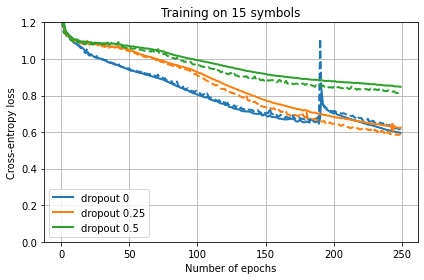

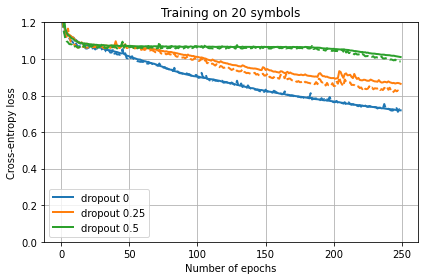

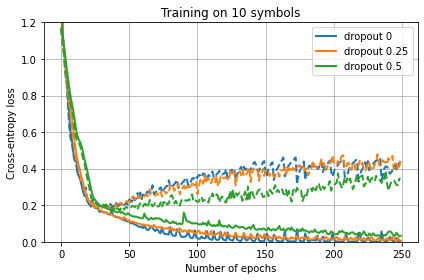

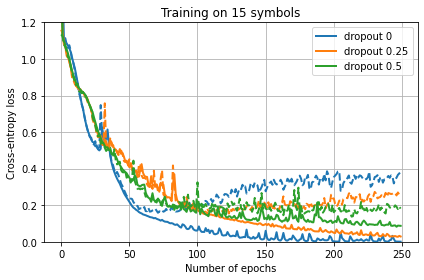

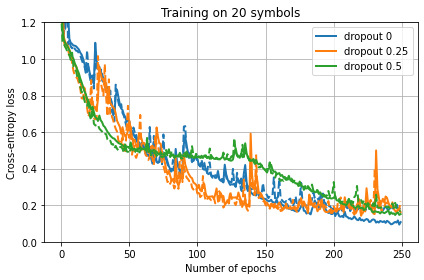

In [14]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]

for model_config in model_configs:
    for seq_length in seq_lengths:
        plt.figure()
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C0', linewidth=2)
        plt.plot(model['val_losses'], f'C0--', linewidth=2)
        print(f"best val_loss: {np.array(model['val_losses']).min()}")

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(model['losses'], f'C1', linewidth=2)
        plt.plot(model['val_losses'], f'C1--', linewidth=2)

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(model['losses'], f'C2', linewidth=2)
        plt.plot(model['val_losses'], f'C2--', linewidth=2)

        legend_elements = [Line2D([0], [0], color='C0', lw=2, label='weight decay'),
                            Line2D([0], [0], color='C1', lw=2, label='dropout 0.25'),
                            Line2D([0], [0], color='C2', lw=2, label='dropout 0.5')]

        plt.legend(legend_elements, ['dropout 0', 'dropout 0.25', 'dropout 0.5'])
        plt.ylim([0,1.2])
        plt.grid()
        plt.xlabel('Number of epochs')
        plt.ylabel('Cross-entropy loss')
        plt.title(f'Training on {seq_length} symbols')
        plt.tight_layout()
        # plt.savefig(f'figures/seq2seq_bpsk_qpsk_dropout_training_{model_config[1]}_{model_config[0]}_seq_{seq_length}.png', dpi=300, bbox_inches='tight')

In [15]:
model_config = (16,3)

for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
    print(np.array(results['qpsk_accs']).mean())

print("\nDropout 0.25")
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
    print(np.array(results['qpsk_accs']).mean())

print("\nDropout 0.5")
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
    print(np.array(results['qpsk_accs']).mean())

0.7622102864583333
0.6330056423611111
0.6478287760416668
0.6308235677083331
0.3644704861111111
0.3060677083333333

Dropout 0.25
0.7425065104166666
0.6759331597222222
0.5355240885416667
0.6037369791666666
0.3564605034722222
0.31140299479166667

Dropout 0.5
0.6618717447916667
0.46076388888888886
0.5108756510416667
0.3552311197916667
0.35893663194444436
0.23693847656250003


In [16]:
model_config = (128,3)

for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
    print(np.array(results['qpsk_accs']).mean())

print("\nDropout 0.25")
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
    print(np.array(results['qpsk_accs']).mean())

print("\nDropout 0.5")
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
    print(np.array(results['bpsk_accs']).mean())
for seq_length in seq_lengths:
    results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
    print(np.array(results['qpsk_accs']).mean())

0.689775390625
0.67626953125
0.6797998046875
0.6666113281249999
0.6820464409722221
0.683984375

Dropout 0.25
0.7011002604166666
0.6891276041666666
0.6530875651041667
0.6632682291666668
0.6783897569444444
0.6777327473958331

Dropout 0.5
0.69056640625
0.7012521701388889
0.6827750651041669
0.6726074218750002
0.6807530381944445
0.6806575520833335


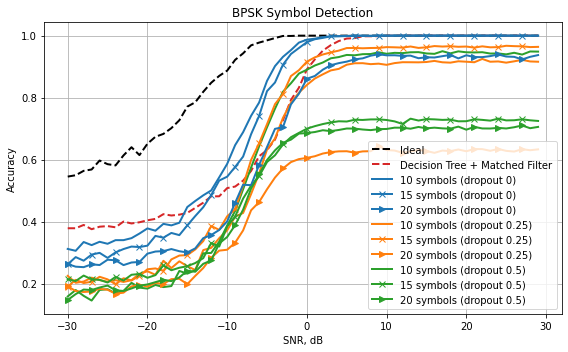

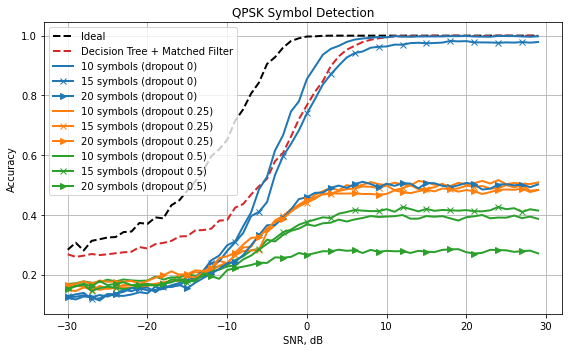

In [17]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]
model_config = (16,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    if mod == 'bpsk':
        plt.plot(results['snr_range'], mf_bpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_bpsk_baseline, '--C3', linewidth=2)
    else:
        plt.plot(results['snr_range'], mf_qpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_qpsk_baseline, '--C3', linewidth=2)

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}', linewidth=2)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}-x', markevery=3, linewidth=2)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3, linewidth=2)

    legend_elements = [Line2D([0], [0], linestyle='--', color='k', lw=2),
                       Line2D([0], [0], linestyle='--', color='C3', lw=2),
                        Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='x', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='x', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='x', color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['Ideal', 'Decision Tree + Matched Filter',
                                '10 symbols (dropout 0)', '15 symbols (dropout 0)', '20 symbols (dropout 0)',
                                '10 symbols (dropout 0.25)', '15 symbols (dropout 0.25)', '20 symbols (dropout 0.25)',
                                '10 symbols (dropout 0.5)', '15 symbols (dropout 0.5)', '20 symbols (dropout 0.5)'])
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()

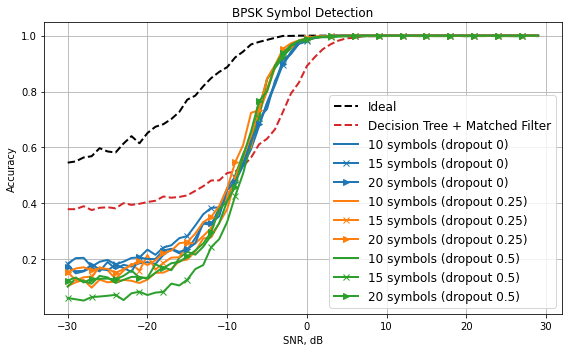

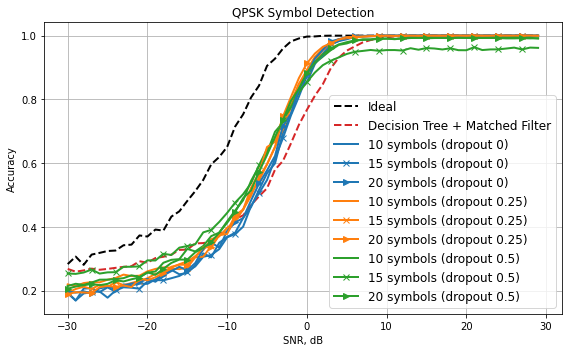

In [178]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]
model_config = (128,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    if mod == 'bpsk':
        plt.plot(results['snr_range'], mf_bpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_bpsk_baseline, '--C3', linewidth=2)
    else:
        plt.plot(results['snr_range'], mf_qpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_qpsk_baseline, '--C3', linewidth=2)

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}', linewidth=2)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}-x', markevery=3, linewidth=2)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3, linewidth=2)

    legend_elements = [Line2D([0], [0], linestyle='--', color='k', lw=2),
                       Line2D([0], [0], linestyle='--', color='C3', lw=2),
                        Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='x', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='x', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='x', color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['Ideal', 'Decision Tree + Matched Filter',
                                '10 symbols (dropout 0)', '15 symbols (dropout 0)', '20 symbols (dropout 0)',
                                '10 symbols (dropout 0.25)', '15 symbols (dropout 0.25)', '20 symbols (dropout 0.25)',
                                '10 symbols (dropout 0.5)', '15 symbols (dropout 0.5)', '20 symbols (dropout 0.5)'], fontsize=12)
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()
    plt.savefig(f'figures/{mod}_demod_accs.png', dpi=300, bbox_inches='tight')

In [19]:
dropouts = [0, 0.25, 0.5]
hidden_sizes = [16, 128]
mods = ['bpsk', 'qpsk']

table = np.zeros([len(seq_lengths)*len(hidden_sizes)*len(dropouts), 6])
j=0
for seq_length in seq_lengths:
    for hs in hidden_sizes:
        for drop in dropouts:
            if drop == 0:
                results = torch.load(f"results/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048.pt")
            else:
                results = torch.load(f"results/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048_dropout_{drop}.pt")
            
            if drop == 0:
                models = torch.load(f"models/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048.pt")
            else:
                models = torch.load(f"models/bpsk_qpsk_seq_{hs}_3_{seq_length}_trained_on_2048_dropout_{drop}.pt")
            
            mean_acc_bpsk = np.array(results[f'bpsk_accs']).mean()
            mean_acc_qpsk = np.array(results[f'bpsk_accs']).mean()
            overall_acc = (mean_acc_bpsk + mean_acc_qpsk)/2
            best_loss = round(np.array(models['losses']).min(), 3)
            best_val_loss = round(np.array(models['val_losses']).min(), 3)
            # print(seq_length, mod.upper(), hs, drop, best_loss, best_val_loss, mean_acc)
            table[j] = np.array([seq_length, hs, drop, best_loss, best_val_loss, overall_acc])
            j+=1

test_frame = pd.DataFrame(table, columns=['seq length', 'hidden size', 'dropout', 'best loss', 'best val loss', 'mean acc'])
test_frame['hidden size'] = test_frame['hidden size'].astype(int)
test_frame['best loss'] = test_frame['best loss'].map('{:,.3}'.format)
test_frame['best val loss'] = test_frame['best val loss'].map('{:,.4}'.format)
test_frame['mean acc'] = test_frame['mean acc'].map('{:,.3}'.format)
test_frame

# test_frame.to_latex('dropout.tex', index=False)

,seq length,hidden size,dropout,best loss,best val loss,mean acc
0,10.0,16,0.00,0.18,0.191,0.762
1,10.0,16,0.25,0.382,0.31,0.743
2,10.0,16,0.50,0.687,0.598,0.662
3,10.0,128,0.00,0.001,0.191,0.69
4,10.0,128,0.25,0.007,0.183,0.701
5,10.0,128,0.50,0.031,0.171,0.691
6,15.0,16,0.00,0.596,0.616,0.633
7,15.0,16,0.25,0.623,0.584,0.676
8,15.0,16,0.50,0.848,0.813,0.461
9,15.0,128,0.00,0.001,0.159,0.676


# Conv

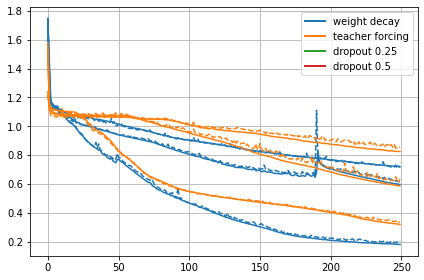

In [20]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3)]#[(16,3), (128,3)]

for seq_length in seq_lengths:
    for idx, model_config in enumerate(model_configs):
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C0')
        plt.plot(model['val_losses'], f'C0--')

model_configs = [(16,2)]
for seq_length in seq_lengths:
    for idx, model_config in enumerate(model_configs):
        model = torch.load(f"models/conv/conv_bpsk_qpsk_{model_config[0]}_{model_config[1]}_seq_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C1')
        plt.plot(model['val_losses'], f'C1--')

# for seq_length in seq_lengths:
#     for idx, model_config in enumerate(model_configs):
#         model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_tf_ratio_0.25.pt")
#         plt.plot(model['losses'], f'C1')
#         plt.plot(model['val_losses'], f'C1--')

legend_elements = [Line2D([0], [0], color='C0', lw=2, label='weight decay'),
                    Line2D([0], [0], color='C1', lw=2, label='teacher forcing'),
                    Line2D([0], [0], color='C2', lw=2, label='dropout 0.25'),
                    Line2D([0], [0], color='C3', lw=2, label='dropout 0.5')]

plt.legend(legend_elements, ['weight decay', 'teacher forcing', 'dropout 0.25', 'dropout 0.5'])
plt.grid()
plt.tight_layout()

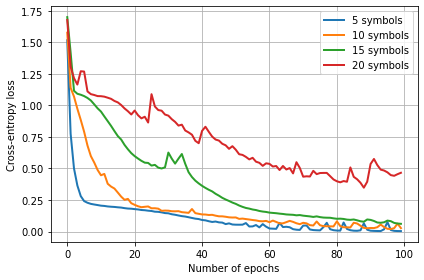

In [189]:
seq_lengths = [5, 10, 15, 20]#, 25]#, 15, 20]
model_configs = [(128,3)]#[(16,3), (128,3)]

for jdx, seq_length in enumerate(seq_lengths):
    for idx, model_config in enumerate(model_configs):
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'][:100], f'C{jdx}', linewidth=2)
        # plt.plot(model['val_losses'], f'C0--')

plt.legend(['5 symbols', '10 symbols', '15 symbols', '20 symbols'])
plt.xlabel('Number of epochs')
plt.ylabel('Cross-entropy loss')
plt.grid()
plt.tight_layout()
plt.savefig('figures/seq2seq_training_losses_only_128_cell_size.png', dpi=300, bbox_inches='tight')

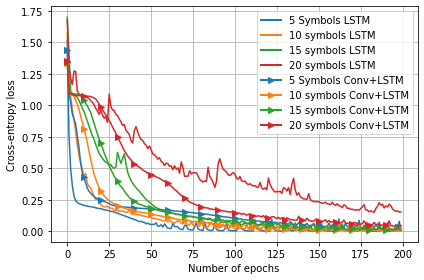

In [188]:
seq_lengths = [5,10, 15, 20]#, 25]#, 15, 20]
model_configs = [(128,3)]#[(16,3), (128,3)]

for jdx, seq_length in enumerate(seq_lengths):
    for idx, model_config in enumerate(model_configs):
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'][:200], f'C{jdx}')
        # plt.plot(model['val_losses'], f'C{jdx}--')

model_configs = [(128,2)]
for jdx, seq_length in enumerate(seq_lengths):
    for idx, model_config in enumerate(model_configs):
        model = torch.load(f"models/conv/conv_bpsk_qpsk_{model_config[0]}_{model_config[1]}_seq_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'][:200], f'C{jdx}->', markevery=10)
        # plt.plot(model['val_losses'], f'C{jdx}--')

legend_elements = [Line2D([0], [0], color='C0', lw=2),
                    Line2D([0], [0], color='C1', lw=2),
                    Line2D([0], [0], color='C2', lw=2),
                    Line2D([0], [0], color='C3', lw=2),
                    Line2D([0], [0], color='C0', marker='>', lw=2),
                    Line2D([0], [0], color='C1', marker='>', lw=2),
                    Line2D([0], [0], color='C2', marker='>', lw=2),
                    Line2D([0], [0], color='C3', marker='>', lw=2)]

plt.legend(legend_elements, ['5 Symbols LSTM', '10 symbols LSTM', '15 symbols LSTM', '20 symbols LSTM',
                             '5 Symbols Conv+LSTM', '10 symbols Conv+LSTM', '15 symbols Conv+LSTM', '20 symbols Conv+LSTM'], fontsize=10)
plt.xlabel('Number of epochs')
plt.ylabel('Cross-entropy loss')
plt.grid()
plt.tight_layout()
plt.savefig('figures/seq2seq_training_losses_only_conv.png', dpi=300, bbox_inches='tight')

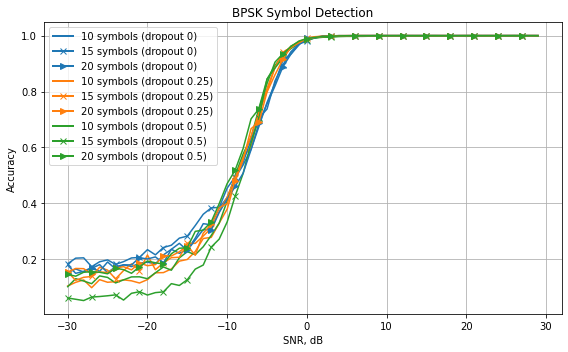

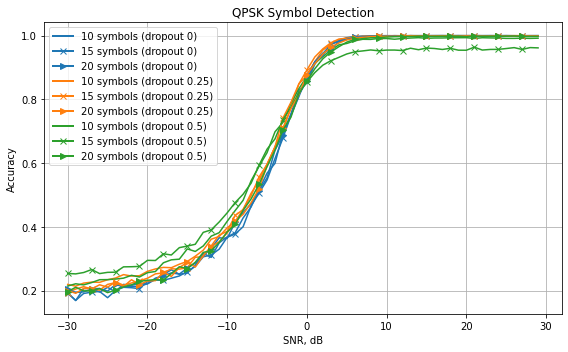

In [24]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(16,3), (128,3)]
model_config = (128,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}')
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}-x', markevery=3)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/conv/conv_bpsk_qpsk_128_2_seq_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3)

    legend_elements = [Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                    Line2D([0], [0], marker='x', color='C0', lw=2, label='10 symbols'),
                    Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='x', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='x', color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['10 symbols (dropout 0)', '15 symbols (dropout 0)', '20 symbols (dropout 0)',
                                '10 symbols (dropout 0.25)', '15 symbols (dropout 0.25)', '20 symbols (dropout 0.25)',
                                '10 symbols (dropout 0.5)', '15 symbols (dropout 0.5)', '20 symbols (dropout 0.5)'])
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()

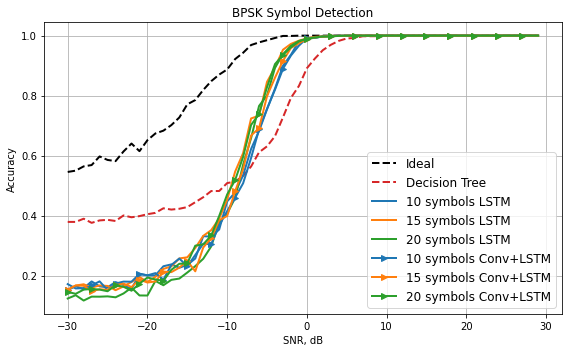

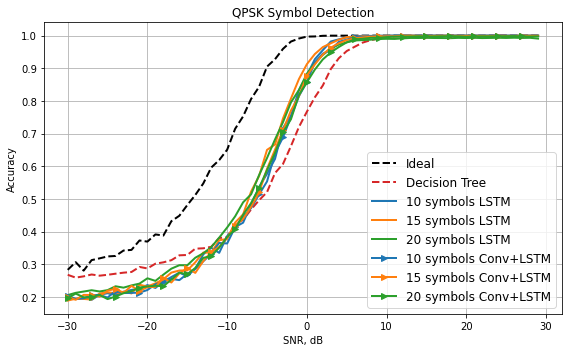

In [177]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_config = (128,3)

mods = ['bpsk', 'qpsk']

for mod in mods:
    plt.figure(figsize=(8,5))

    if mod == 'bpsk':
        plt.plot(results['snr_range'], mf_bpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_bpsk_baseline, '--C3', linewidth=2)
    else:
        plt.plot(results['snr_range'], mf_qpsk_baseline, '--k', linewidth=2)
        plt.plot(results['snr_range'], dt_qpsk_baseline, '--C3', linewidth=2)

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}', linewidth=2)
        # plt.plot(results['snr_range'], results['qpsk_accs'], f'C{idx}--')

    for idx, seq_length in enumerate(seq_lengths):
        results = torch.load(f"results/conv/conv_bpsk_qpsk_128_2_seq_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(results['snr_range'], results[f'{mod}_accs'], f'C{idx}->', markevery=3, linewidth=2)

    legend_elements = [Line2D([0], [0], linestyle='--', color='k', lw=2),
                       Line2D([0], [0], linestyle='--', color='C3', lw=2),
                        Line2D([0], [0], color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], color='C2', lw=2, label='20 symbols'),
                        Line2D([0], [0], marker='>', color='C0', lw=2, label='10 symbols'),
                        Line2D([0], [0], marker='>', color='C1', lw=2, label='15 symbols'),
                        Line2D([0], [0], marker='>', color='C2', lw=2, label='20 symbols')]

    plt.legend(legend_elements, ['Ideal', 'Decision Tree',
                                 '10 symbols LSTM', '15 symbols LSTM', '20 symbols LSTM',
                                 '10 symbols Conv+LSTM', '15 symbols Conv+LSTM', '20 symbols Conv+LSTM'], fontsize=12)
    plt.grid()
    plt.xlabel('SNR, dB')
    plt.ylabel('Accuracy')
    plt.title(f'{mod.upper()} Symbol Detection')
    plt.tight_layout()
    plt.savefig(f'figures/{mod}_conv_encoder_accs.png', dpi=300, bbox_inches='tight')

best val_loss: 0.19072119990984598
best val_loss: 0.1587320665518443
best val_loss: 0.16534746612111728


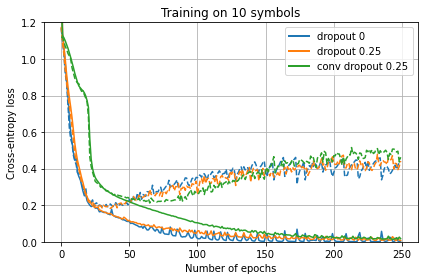

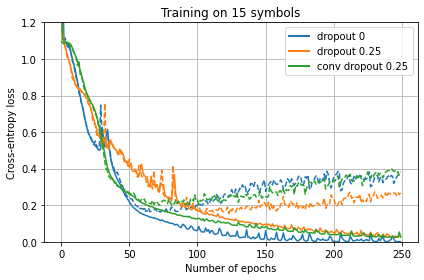

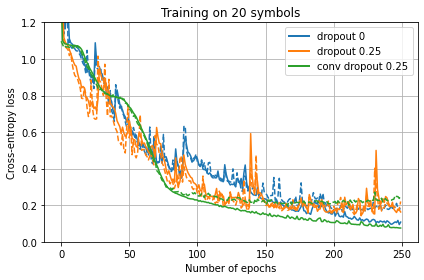

In [25]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(128,3)]

for model_config in model_configs:
    for seq_length in seq_lengths:
        plt.figure()
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C0')
        plt.plot(model['val_losses'], f'C0--')
        print(f"best val_loss: {np.array(model['val_losses']).min()}")

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(model['losses'], f'C1')
        plt.plot(model['val_losses'], f'C1--')

        model = torch.load(f"models/conv/conv_bpsk_qpsk_{model_config[0]}_2_seq_{seq_length}_trained_on_2048_dropout_0.25.pt")
        plt.plot(model['losses'], f'C2')
        plt.plot(model['val_losses'], f'C2--')

        legend_elements = [Line2D([0], [0], color='C0', lw=2, label='weight decay'),
                            Line2D([0], [0], color='C1', lw=2, label='dropout 0.25'),
                            Line2D([0], [0], color='C2', lw=2, label='conv dropout 0.25')]

        plt.legend(legend_elements, ['dropout 0', 'dropout 0.25', 'conv dropout 0.25'])
        plt.ylim([0,1.2])
        plt.grid()
        plt.xlabel('Number of epochs')
        plt.ylabel('Cross-entropy loss')
        plt.title(f'Training on {seq_length} symbols')
        plt.tight_layout()

best val_loss: 0.19659484339257083
best val_loss: 0.20814759582281112
best val_loss: 0.23946423133214317


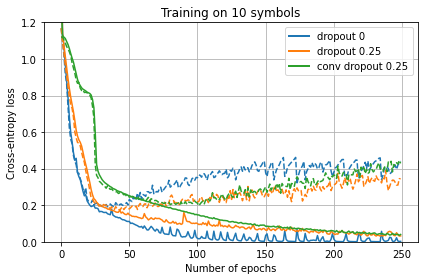

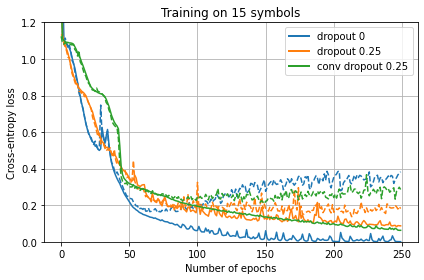

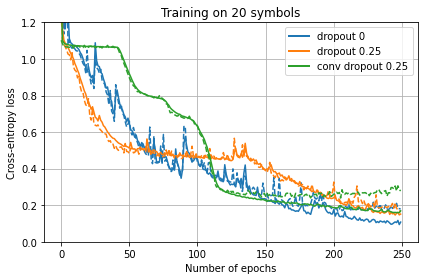

In [26]:
seq_lengths = [10, 15, 20]#, 15, 20]
model_configs = [(128,3)]

for model_config in model_configs:
    for seq_length in seq_lengths:
        plt.figure()
        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048.pt")
        plt.plot(model['losses'], f'C0')
        plt.plot(model['val_losses'], f'C0--')
        

        model = torch.load(f"models/bpsk_qpsk_seq_{model_config[0]}_{model_config[1]}_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(model['losses'], f'C1')
        plt.plot(model['val_losses'], f'C1--')

        model = torch.load(f"models/conv/conv_bpsk_qpsk_{model_config[0]}_2_seq_{seq_length}_trained_on_2048_dropout_0.5.pt")
        plt.plot(model['losses'], f'C2')
        plt.plot(model['val_losses'], f'C2--')
        print(f"best val_loss: {np.array(model['val_losses']).min()}")

        legend_elements = [Line2D([0], [0], color='C0', lw=2, label='weight decay'),
                            Line2D([0], [0], color='C1', lw=2, label='dropout 0.25'),
                            Line2D([0], [0], color='C2', lw=2, label='conv dropout 0.25')]

        plt.legend(legend_elements, ['dropout 0', 'dropout 0.25', 'conv dropout 0.25'])
        plt.ylim([0,1.2])
        plt.grid()
        plt.xlabel('Number of epochs')
        plt.ylabel('Cross-entropy loss')
        plt.title(f'Training on {seq_length} symbols')
        plt.tight_layout()

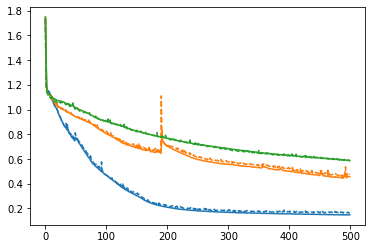

In [27]:
model = torch.load("models/bpsk_qpsk_seq_16_3_10_trained_on_2048_500_epochs.pt")
plt.plot(model['losses'], 'C0')
plt.plot(model['val_losses'],'C0--')
model = torch.load("models/bpsk_qpsk_seq_16_3_15_trained_on_2048_500_epochs.pt")
plt.plot(model['losses'], 'C1')
plt.plot(model['val_losses'],'C1--')
model = torch.load("models/bpsk_qpsk_seq_16_3_20_trained_on_2048_500_epochs.pt")
plt.plot(model['losses'], 'C2')
plt.plot(model['val_losses'],'C2--')